## Part 1: Project Planning

blah blah blah

## Part 2: Data Collection

get_jobs() is copied from:
* https://towardsdatascience.com/selenium-tutorial-scraping-glassdoor-com-in-10-minutes-3d0915c6d905
* https://github.com/arapfaik/scraping-glassdoor-selenium

with the following modifications:
* specify the correct path before passing it as an argument to webdriver.Chrome()
* copy the url from Ken Jee's github to scrape the Salary info and to not narrow the search to San Francisco only.
* change sleep time to 15 seconds
* change the argument to driver.find_element_by_css_selector()
* change the argument to driver.find_element_by_xpath()

get_jobs() doesn't work. after 15 iterations it fetches salary as -1

In [35]:
from selenium.common.exceptions import NoSuchElementException, ElementClickInterceptedException
from selenium import webdriver
import time
import pandas as pd

In [31]:
def get_jobs(keyword, num_jobs, verbose):
    
    '''Gathers jobs as a dataframe, scraped from Glassdoor'''
    
    #Initializing the webdriver
    options = webdriver.ChromeOptions()
    
    #Uncomment the line below if you'd like to scrape without a new Chrome window every time.
    #options.add_argument('headless')
    
    #Change the path to where chromedriver is in your home folder.
    # driver = webdriver.Chrome(executable_path="/Users/omersakarya/Documents/GitHub/scraping-glassdoor-selenium/chromedriver", options=options)
    path = '/Users/My/workspace/YouTube/Ken Jee/chromedriver'
    driver = webdriver.Chrome(executable_path=path, options=options)
    driver.set_window_size(1120, 1000)

    # url = 'https://www.glassdoor.com/Job/jobs.htm?sc.keyword="' + keyword + '"&locT=C&locId=1147401&locKeyword=San%20Francisco,%20CA&jobType=all&fromAge=-1&minSalary=0&includeNoSalaryJobs=true&radius=100&cityId=-1&minRating=0.0&industryId=-1&sgocId=-1&seniorityType=all&companyId=-1&employerSizes=0&applicationType=0&remoteWorkType=0'
    url = "https://www.glassdoor.com/Job/jobs.htm?suggestCount=0&suggestChosen=false&clickSource=searchBtn&typedKeyword="+keyword+"&sc.keyword="+keyword+"&locT=&locId=&jobType="
    driver.get(url)
    jobs = []

    while len(jobs) < num_jobs:  #If true, should be still looking for new jobs.

        #Let the page load. Change this number based on your internet speed.
        #Or, wait until the webpage is loaded, instead of hardcoding it.
        # time.sleep(4)
        time.sleep(15)

        #Test for the "Sign Up" prompt and get rid of it.
        try:
            driver.find_element_by_class_name("selected").click()
        except ElementClickInterceptedException:
            pass

        time.sleep(.1)

        try:
            # driver.find_element_by_class_name("ModalStyle__xBtn___29PT9").click()  #clicking to the X.
            driver.find_element_by_css_selector('[alt="Close"]').click()
        except NoSuchElementException:
            pass

        
        #Going through each job in this page
        job_buttons = driver.find_elements_by_class_name("jl")  #jl for Job Listing. These are the buttons we're going to click.
        for job_button in job_buttons:  

            print("Progress: {}".format("" + str(len(jobs)) + "/" + str(num_jobs)))
            if len(jobs) >= num_jobs:
                break

            job_button.click()  #You might 
            time.sleep(1)
            collected_successfully = False
            
            while not collected_successfully:
                try:
                    company_name = driver.find_element_by_xpath('.//div[@class="employerName"]').text
                    location = driver.find_element_by_xpath('.//div[@class="location"]').text
                    job_title = driver.find_element_by_xpath('.//div[contains(@class, "title")]').text
                    job_description = driver.find_element_by_xpath('.//div[@class="jobDescriptionContent desc"]').text
                    collected_successfully = True
                except:
                    time.sleep(5)

            try:
                # salary_estimate = driver.find_element_by_xpath('.//span[@class="gray small salary"]').text
                salary_estimate = driver.find_element_by_xpath('.//span[@class="gray salary"]').text
            except NoSuchElementException:
                salary_estimate = -1 #You need to set a "not found value. It's important."
            
            try:
                rating = driver.find_element_by_xpath('.//span[@class="rating"]').text
            except NoSuchElementException:
                rating = -1 #You need to set a "not found value. It's important."

            #Printing for debugging
            if verbose:
                print("Job Title: {}".format(job_title))
                print("Salary Estimate: {}".format(salary_estimate))
                print("Job Description: {}".format(job_description[:500]))
                print("Rating: {}".format(rating))
                print("Company Name: {}".format(company_name))
                print("Location: {}".format(location))

            #Going to the Company tab...
            #clicking on this:
            #<div class="tab" data-tab-type="overview"><span>Company</span></div>
            try:
                driver.find_element_by_xpath('.//div[@class="tab" and @data-tab-type="overview"]').click()

                try:
                    #<div class="infoEntity">
                    #    <label>Headquarters</label>
                    #    <span class="value">San Francisco, CA</span>
                    #</div>
                    headquarters = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Headquarters"]//following-sibling::*').text
                except NoSuchElementException:
                    headquarters = -1

                try:
                    size = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Size"]//following-sibling::*').text
                except NoSuchElementException:
                    size = -1

                try:
                    founded = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Founded"]//following-sibling::*').text
                except NoSuchElementException:
                    founded = -1

                try:
                    type_of_ownership = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Type"]//following-sibling::*').text
                except NoSuchElementException:
                    type_of_ownership = -1

                try:
                    industry = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Industry"]//following-sibling::*').text
                except NoSuchElementException:
                    industry = -1

                try:
                    sector = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Sector"]//following-sibling::*').text
                except NoSuchElementException:
                    sector = -1

                try:
                    revenue = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Revenue"]//following-sibling::*').text
                except NoSuchElementException:
                    revenue = -1

                try:
                    competitors = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Competitors"]//following-sibling::*').text
                except NoSuchElementException:
                    competitors = -1

            except NoSuchElementException:  #Rarely, some job postings do not have the "Company" tab.
                headquarters = -1
                size = -1
                founded = -1
                type_of_ownership = -1
                industry = -1
                sector = -1
                revenue = -1
                competitors = -1

                
            if verbose:
                print("Headquarters: {}".format(headquarters))
                print("Size: {}".format(size))
                print("Founded: {}".format(founded))
                print("Type of Ownership: {}".format(type_of_ownership))
                print("Industry: {}".format(industry))
                print("Sector: {}".format(sector))
                print("Revenue: {}".format(revenue))
                print("Competitors: {}".format(competitors))
                print("@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@")

            jobs.append({"Job Title" : job_title,
            "Salary Estimate" : salary_estimate,
            "Job Description" : job_description,
            "Rating" : rating,
            "Company Name" : company_name,
            "Location" : location,
            "Headquarters" : headquarters,
            "Size" : size,
            "Founded" : founded,
            "Type of ownership" : type_of_ownership,
            "Industry" : industry,
            "Sector" : sector,
            "Revenue" : revenue,
            "Competitors" : competitors})
            #add job to jobs

        #Clicking on the "next page" button
        try:
            driver.find_element_by_xpath('.//li[@class="next"]//a').click()
        except NoSuchElementException:
            print("Scraping terminated before reaching target number of jobs. Needed {}, got {}.".format(num_jobs, len(jobs)))
            break

    return pd.DataFrame(jobs)  #This line converts the dictionary object into a pandas DataFrame.

In [34]:
#This line will open a new chrome window and start the scraping.
df = get_jobs("data scientist", 1000, False)
df

Progress: 0/15
Progress: 1/15
Progress: 2/15
Progress: 3/15
Progress: 4/15
Progress: 5/15
Progress: 6/15
Progress: 7/15
Progress: 8/15
Progress: 9/15
Progress: 10/15
Progress: 11/15
Progress: 12/15
Progress: 13/15
Progress: 14/15
Progress: 15/15


,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Senior Data Scientist,-1,Job Description:\nAt Fidelity’s Artificial Int...,4.1,Fidelity Investments\n4.1,"Boston, MA",-1,10000+ Employees,1946,Company - Private,Investment Banking & Asset Management,Finance,$10+ billion (USD),-1
1,Data Scientist Supply Chain Optimization,-1,*Please note -we ask all candidates to create ...,4.2,Andrews Distributing\n4.2,"Allen, TX",-1,1001 to 5000 Employees,-1,Company - Private,Wholesale,Business Services,$500 million to $1 billion (USD),-1
2,Senior Data Scientist,-1,About Fracta\nFracta.ai usesmachine learning a...,-1,Fracta,"Redwood City, CA",-1,-1,-1,-1,-1,-1,-1,-1
3,Data Engineer,-1,What you will do\nWork with the team to load d...,5.0,HealthVerity\n5.0,"Philadelphia, PA",-1,51 to 200 Employees,2014,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,-1
4,Data Analyst I,-1,Overview\n\n\nWestern National is seeking an e...,3.9,Western National Insurance\n3.9,"Edina, MN",-1,501 to 1000 Employees,1901,Company - Private,Insurance Carriers,Insurance,$500 million to $1 billion (USD),-1
5,Project Scientist I,-1,Job Details\nLevel\nEntry\nJob Location\nPitts...,4.0,"Alliance Source Testing, LLC\n4.0","Pittsburgh, PA",-1,51 to 200 Employees,2000,Company - Private,Architectural & Engineering Services,Business Services,$10 to $25 million (USD),-1
6,Project Scientist I,-1,Job Details\nLevel\nEntry\nJob Location\nPitts...,4.0,"Alliance Source Testing, LLC\n4.0","Pittsburgh, PA",-1,5001 to 10000 Employees,1852,Company - Public,Insurance Carriers,Insurance,$5 to $10 billion (USD),-1
7,Machine Learning Scientists/Engineers,-1,Machine Learning Scientists/Engineers\nCompany...,-1,"NovoDynamics, Inc.","Ann Arbor, MI",-1,-1,-1,-1,-1,-1,-1,-1
8,FCC Data Scientist,-1,Requisition Number:\n4199\n\nJob Title:\nFCC D...,2.9,BankUnited\n2.9,"Miami Lakes, FL",-1,1001 to 5000 Employees,2009,Company - Public,Banks & Credit Unions,Finance,$10+ billion (USD),-1
9,Senior Data Engineer,-1,Join our team dedicated to developing and exec...,4.6,Novetta\n4.6,"Reston, VA",-1,501 to 1000 Employees,2012,Company - Private,Enterprise Software & Network Solutions,Information Technology,$100 to $500 million (USD),-1


In [ ]:
# df.to_csv('glassdoor_raw.csv', index=False)

## Part 3: Data Cleaning

since get_jobs() failed to collect data, i'll just use Ken's pre-downloaded glassdoor_jobs.csv for this section

In [142]:
df = pd.read_csv('glassdoor_raw.csv')
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


### a. clean up column 'Salary Estimate'

In [143]:
df[df['Salary Estimate'] == '-1']

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
24,24,Data Scientist,-1,JOB CATEGORY:\n\nInformation Services\n\nREQUI...,3.9,Mars\n3.9,Oregon,"Mc Lean, VA",10000+ employees,1911,Company - Private,Food & Beverage Manufacturing,Manufacturing,$10+ billion (USD),-1
42,42,Data Scientist,-1,Take your career to new heights working with a...,4.1,Amount\n4.1,"Chicago, IL","Chicago, IL",201 to 500 employees,2015,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable,-1
47,47,Data Science Analyst,-1,Company Overview:\n\nBrightside is an employee...,5.0,Brightside\n5.0,"Chandler, AZ","San Francisco, CA",51 to 200 employees,2017,Company - Private,Investment Banking & Asset Management,Finance,Unknown / Non-Applicable,-1
53,53,Data Engineer,-1,"Data Engineer\n£50,000 – £70,000 See Advert\n\...",4.5,Anson McCade\n4.5,"Kingdom, IL","London, United Kingdom",51 to 200 employees,2000,Company - Private,Staffing & Outsourcing,Business Services,$1 to $5 million (USD),-1
64,64,Business Intelligence Analyst,-1,Business Intelligence Analyst\nAccounting\n50 ...,3.1,Amica Mutual\n3.1,"Lincoln, RI","Lincoln, RI",1001 to 5000 employees,1907,Company - Private,Insurance Carriers,Insurance,$1 to $2 billion (USD),-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,923,Data Engineer 5 - Contract,-1,Purposes\n\nThis is a contract position that w...,4.2,The Church of Jesus Christ of Latter-day Saint...,"Riverton, UT","Salt Lake City, UT",10000+ employees,-1,Nonprofit Organization,Religious Organizations,Non-Profit,Unknown / Non-Applicable,-1
925,925,Data Scientists,-1,Position Description:\nThe Analytics Research ...,3.3,Miracle Software Systems\n3.3,Michigan,"Novi, MI",51 to 200 employees,1994,Company - Private,IT Services,Information Technology,$50 to $100 million (USD),"CSC, IBM"
927,927,"Head Data Scientist – Image Analytics lead, No...",-1,"06-Feb-2020\n\nJob ID\n279186BR\n{""QuestionNam...",3.8,Novartis\n3.8,"Cambridge, MA","Basel, Switzerland",10000+ employees,1996,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),-1
937,937,"Scientist, Product Development",-1,Requisition Number:\nVALA4948\n\nJob Title:\nS...,2.9,Pharmavite\n2.9,"Valencia, CA","West Hills, CA",1001 to 5000 employees,1971,Company - Private,Consumer Products Manufacturing,Manufacturing,$1 to $2 billion (USD),"The Nature's Bounty Co., Schiff Nutrition Inte..."


In [144]:
len(df[df['Salary Estimate'] == '-1'])

214

In [145]:
len(df)

956

In [146]:
# remove rows with 'Salary Estimate' of -1
df = df[df['Salary Estimate'] != '-1']
len(df)

742

In [147]:
# create columns 'hourly' and 'employer_provided'
df['hourly'] = df['Salary Estimate'].apply(lambda x: 1 if 'per hour' in x.lower() else 0)
df['employer_provided'] = df['Salary Estimate'].apply(lambda x: 1 if 'employer provided salary:' in x.lower() else 0)
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0


In [148]:
# extract the salary range
sal_range = df['Salary Estimate'].apply(lambda x: x.split('(')[0])
# remove the letter 'K' and the dollar sign '$'
sal_noK_noDollar = sal_range.apply(lambda x: x.replace('K', '').replace('$', ''))
# remove rows containing 'Per Hour' and 'Employer Provided Salary'
sal_noHour_noEmploy = sal_noK_noDollar.apply(lambda x: x.lower().replace('per hour', '').replace('employer provided salary:', ''))
sal_noHour_noEmploy

0       53-91 
1      63-112 
2       80-90 
3       56-97 
4      86-143 
        ...   
950    58-111 
951    72-133 
952     56-91 
953    95-160 
955    61-126 
Name: Salary Estimate, Length: 742, dtype: object

In [149]:
# create columns 'min_salary', 'max_salary' and 'avg_salaray'
df['min_salary'] = sal_noHour_noEmploy.apply(lambda x: int(x.split('-')[0]))
df['max_salary'] = sal_noHour_noEmploy.apply(lambda x: int(x.split('-')[1]))
df['avg_salary'] = (df.min_salary + df.max_salary) / 2
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5


### b. clean up column 'Company Name'

In [150]:
# remove rating from company name
df['company_name'] = df.apply(lambda x: x['Company Name'] if x['Rating'] < 0 else x['Company Name'][:-4], axis=1)
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,Industry,Sector,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,company_name
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,Security Services,Business Services,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions


### c. clean up column 'Location'

In [151]:
# extract state names only
df['state'] = df.Location.apply(lambda x: x.split(',')[1])
df.state.value_counts()

 CA             151
 MA             103
 NY              72
 VA              41
 IL              40
 MD              35
 PA              33
 TX              28
 NC              21
 WA              21
 NJ              17
 FL              16
 OH              14
 TN              13
 CO              11
 DC              11
 WI              10
 UT              10
 IN              10
 AZ               9
 MO               9
 AL               8
 KY               6
 MI               6
 GA               6
 DE               6
 CT               5
 IA               5
 OR               4
 NE               4
 LA               4
 KS               3
 NM               3
 MN               2
 ID               2
 RI               1
 SC               1
 Los Angeles      1
Name: state, dtype: int64

In [152]:
df['same_state'] = df.apply(lambda x: 1 if x.Location == x.Headquarters else 0, axis=1)
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,company_name,state,same_state
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research,NM,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System,MD,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4,FL,1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL,WA,1
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions,NY,1


### d. clean up column 'Founded'

In [153]:
df['age'] = df.Founded.apply(lambda x: x if x < 1 else 2020 - x)
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,company_name,state,same_state,age
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,-1,0,0,53,91,72.0,Tecolote Research,NM,0,47
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,-1,0,0,63,112,87.5,University of Maryland Medical System,MD,0,36
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,-1,0,0,80,90,85.0,KnowBe4,FL,1,10
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL,WA,1,55
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions,NY,1,22


### e. clean up column 'Job Description'

In [154]:
df['python'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
df['r_studio'] = df['Job Description'].apply(lambda x: 1 if 'r studio' in x.lower() or 'r-studio' in x.lower() else 0)
df['spark'] = df['Job Description'].apply(lambda x: 1 if 'spark' in x.lower() else 0)
df['aws'] = df['Job Description'].apply(lambda x: 1 if 'aws' in x.lower() else 0)
df['excel'] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)

In [155]:
# drop column 'Unnamed: 0' and save dataframe
df = df.drop(['Unnamed: 0'], axis=1)
df.to_csv('glassdoor_cleaned.csv', index=False)

## Part 4: Exploratory Data Analysis

In [274]:
df = pd.read_csv('glassdoor_cleaned.csv')

In [156]:
# copied from data_eda
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

In [157]:
# copied from data_eda
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [158]:
# parse job title
df['job_simplified'] = df['Job Title'].apply(title_simplifier)
df.job_simplified.value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: job_simplified, dtype: int64

In [159]:
# parse seniority
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [160]:
df.state.value_counts()

 CA             151
 MA             103
 NY              72
 VA              41
 IL              40
 MD              35
 PA              33
 TX              28
 NC              21
 WA              21
 NJ              17
 FL              16
 OH              14
 TN              13
 CO              11
 DC              11
 WI              10
 UT              10
 IN              10
 AZ               9
 MO               9
 AL               8
 KY               6
 MI               6
 GA               6
 DE               6
 CT               5
 IA               5
 OR               4
 NE               4
 LA               4
 KS               3
 NM               3
 MN               2
 ID               2
 RI               1
 SC               1
 Los Angeles      1
Name: state, dtype: int64

In [161]:
# remove state named 'Los Angeles'
df.state = df.state.apply(lambda x: x.strip() if x.strip() != 'Los Angeles' else 'CA')
df.state.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
WA     21
NC     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
IN     10
UT     10
WI     10
MO      9
AZ      9
AL      8
DE      6
KY      6
MI      6
GA      6
IA      5
CT      5
NE      4
OR      4
LA      4
KS      3
NM      3
ID      2
MN      2
RI      1
SC      1
Name: state, dtype: int64

In [162]:
df['JD_length'] = df['Job Description'].apply(lambda x: len(x))
df.JD_length

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
950    6162
951    6130
952    3078
953    1642
955    3673
Name: JD_length, Length: 742, dtype: int64

In [163]:
df['num_competitors'] = df.Competitors.apply(lambda x: len(x.split(',')) if x != '-1' else 0)
df.Competitors

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
950                           Pfizer, AstraZeneca, Merck
951                      See Tickets, TicketWeb, Vendini
952                                                   -1
953                                                   -1
955                                                   -1
Name: Competitors, Length: 742, dtype: object

In [164]:
# convert hourly wage to annual salary
df.min_salary = df.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary, axis=1)

In [165]:
df.max_salary = df.apply(lambda x: x.max_salary*2 if x.hourly == 1 else x.max_salary, axis=1)

In [166]:
df[df.hourly == 1][['hourly', 'min_salary', 'max_salary']]

,hourly,min_salary,max_salary
197,1,34,48
209,1,42,68
240,1,36,50
247,1,42,68
257,1,30,50
307,1,34,48
337,1,42,68
427,1,36,50
437,1,48,78
456,1,42,68


In [167]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python,r_studio,spark,aws,excel,JD_length,num_competitors
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


In [168]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_name', 'state', 'same_state', 'age', 'python', 'r_studio',
       'spark', 'aws', 'excel', 'job_simplified', 'seniority', 'JD_length',
       'num_competitors'],
      dtype='object')

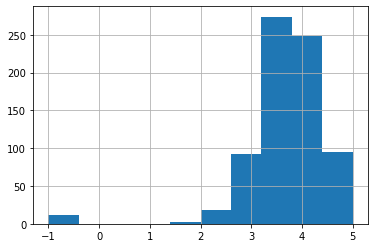

In [169]:
df.Rating.hist()

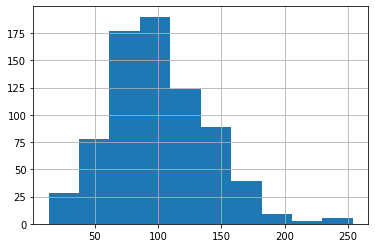

In [170]:
df.avg_salary.hist()

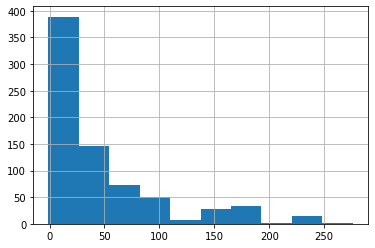

In [171]:
df.age.hist()

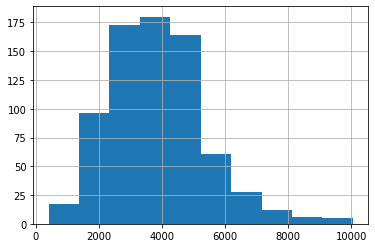

In [172]:
df.JD_length.hist()

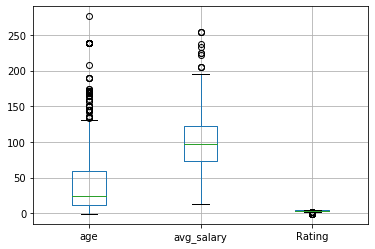

In [173]:
df.boxplot(column=['age', 'avg_salary', 'Rating'])

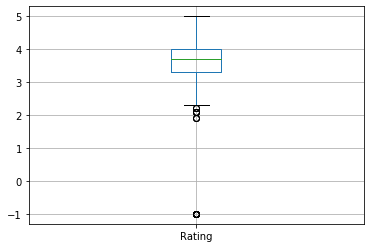

In [174]:
df.boxplot(column='Rating')

In [175]:
# show the correlation between 4 columns: age, avg_salary, Rating and JD_length
df[['age', 'avg_salary', 'Rating', 'JD_length']].corr()

,age,avg_salary,Rating,JD_length
age,1.000000,0.019655,0.021655,0.163911
avg_salary,0.019655,1.000000,0.013492,0.078808
Rating,0.021655,0.013492,1.000000,-0.012281
JD_length,0.163911,0.078808,-0.012281,1.000000


In [177]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_name', 'state', 'same_state', 'age', 'python', 'r_studio',
       'spark', 'aws', 'excel', 'job_simplified', 'seniority', 'JD_length',
       'num_competitors'],
      dtype='object')

In [178]:
df[['age','avg_salary','Rating','JD_length','num_competitors']].dtypes

age                  int64
avg_salary         float64
Rating             float64
JD_length            int64
num_competitors      int64
dtype: object

In [136]:
df.avg_salary = df.avg_salary.astype(int)
df.Rating = df.Rating.astype(int)
df[['age','avg_salary','Rating','JD_length','num_competitors']].dtypes

age                int64
avg_salary         int64
Rating             int64
JD_length          int64
num_competitors    int64
dtype: object

In [199]:
sns.__version__

'0.8.1'

In [180]:
import seaborn as sns

# copied from https://seaborn.pydata.org/examples/many_pairwise_correlations.html
# Generate a custom diverging colormap
sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df[['age','avg_salary','Rating','JD_length','num_competitors']].corr(), vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

TypeError: object of type <class 'float'> cannot be safely interpreted as an integer.

#### there was this error in rendering:
#### "object of type <class 'float'> cannot be safely interpreted as an integer."
#### but the actual heatmap shows strong correlation between 'age' and 'JD_length' and between 'avg_salary' and 'JD_length'

In [181]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_name', 'state', 'same_state', 'age', 'python', 'r_studio',
       'spark', 'aws', 'excel', 'job_simplified', 'seniority', 'JD_length',
       'num_competitors'],
      dtype='object')

In [182]:
# extract categorical columns
df_category = df[['Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_name', 'state', 'same_state', 'python', 'r_studio',
       'spark', 'aws', 'excel', 'job_simplified', 'seniority']]

graph for Location: total = 200


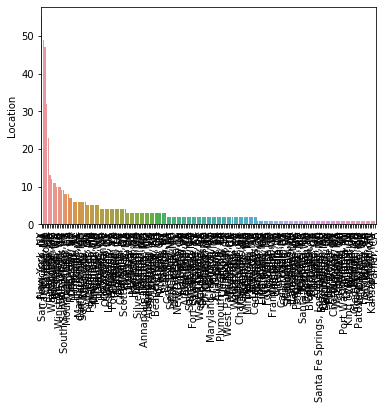

graph for Headquarters: total = 198


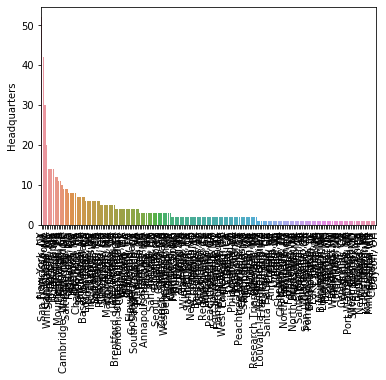

graph for Size: total = 9


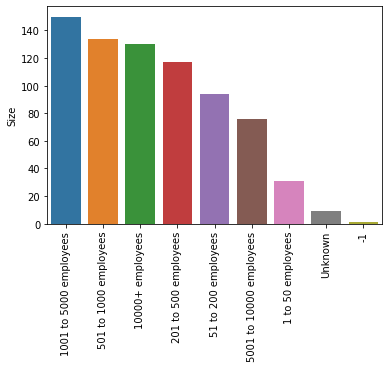

graph for Type of ownership: total = 11


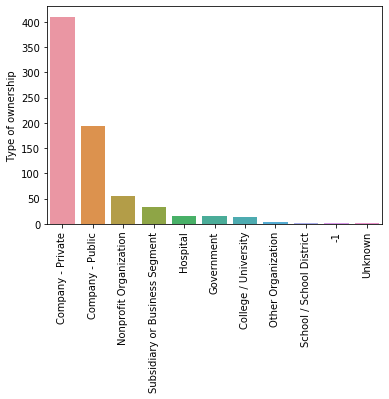

graph for Industry: total = 60


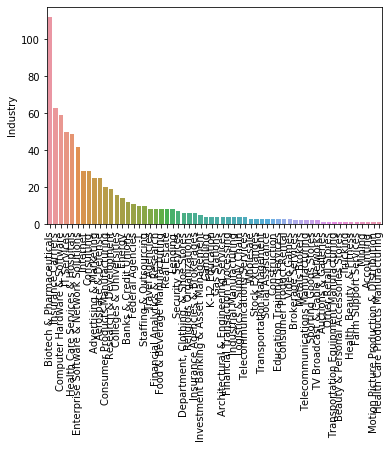

graph for Sector: total = 25


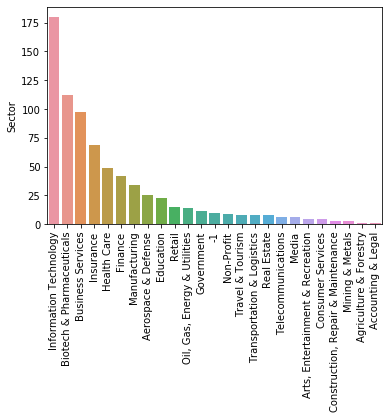

graph for Revenue: total = 14


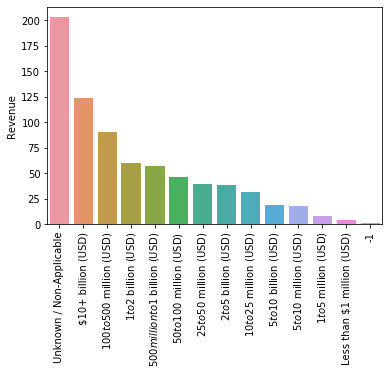

graph for company_name: total = 343


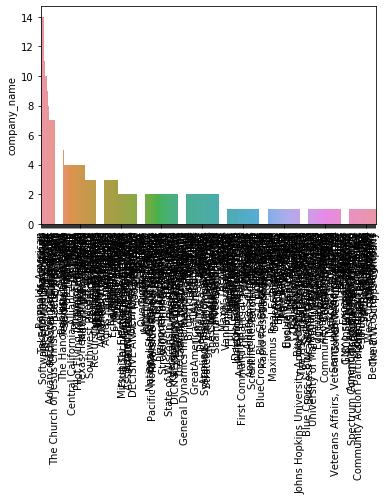

graph for state: total = 37


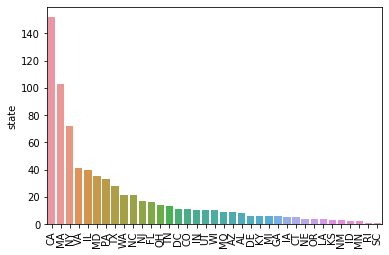

graph for same_state: total = 2


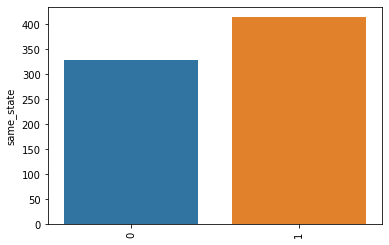

graph for python: total = 2


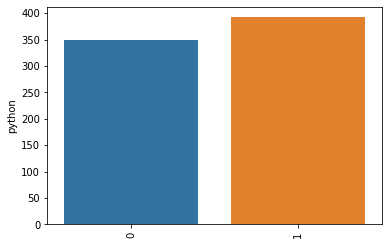

graph for r_studio: total = 2


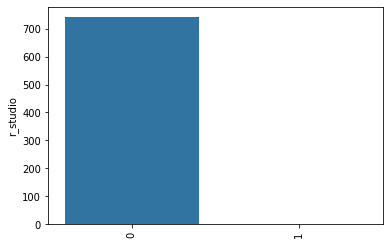

graph for spark: total = 2


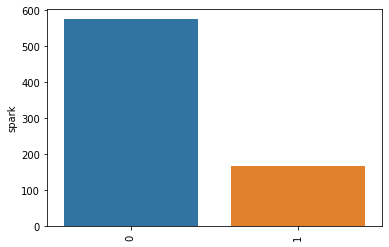

graph for aws: total = 2


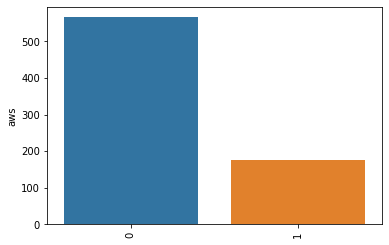

graph for excel: total = 2


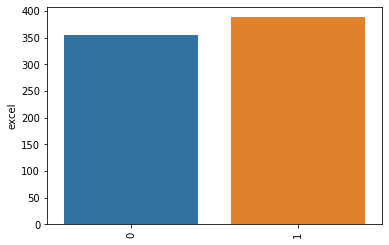

graph for job_simplified: total = 7


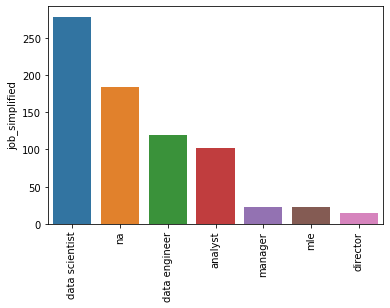

graph for seniority: total = 3


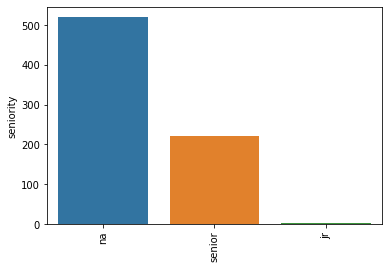

In [184]:
import matplotlib.pyplot as plt

for i in df_category.columns:
    category_count = df_category[i].value_counts()
    print("graph for %s: total = %d" % (i, len(category_count)))
    chart = sns.barplot(x=category_count.index, y=category_count)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


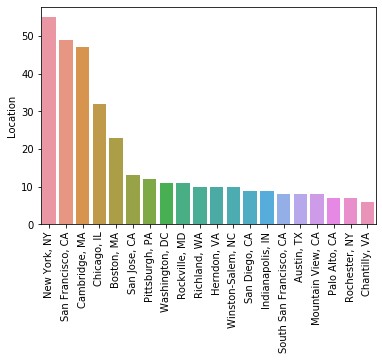

graph for Headquarters: total = 20


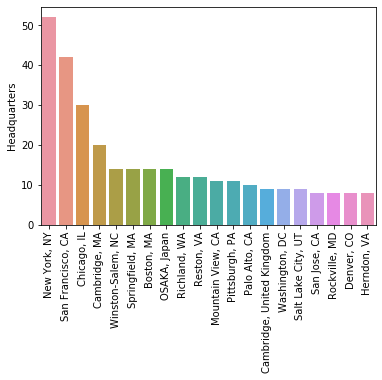

graph for company_name: total = 20


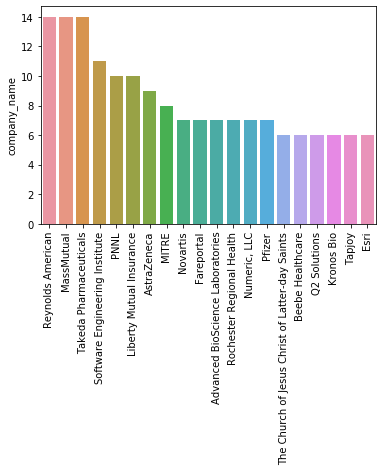

In [185]:
# let's do a selected few categories
df_category = df[['Location', 'Headquarters', 'company_name']]
for i in df_category.columns:
    # only take the top 20
    category_count = df_category[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(category_count)))
    chart = sns.barplot(x=category_count.index, y=category_count)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [186]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_name', 'state', 'same_state', 'age', 'python', 'r_studio',
       'spark', 'aws', 'excel', 'job_simplified', 'seniority', 'JD_length',
       'num_competitors'],
      dtype='object')

In [187]:
pd.pivot_table(df, index='job_simplified', values='avg_salary')

,avg_salary
job_simplified,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [188]:
pd.pivot_table(df, index=['job_simplified', 'seniority'], values='avg_salary')

avg_salary
job_simplified seniority            
analyst        jr          56.500000
               na          61.155405
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [193]:
pd.pivot_table(df, index=['state', 'job_simplified'], values='avg_salary').sort_values('state', ascending=False)

avg_salary
state job_simplified            
WI    na               54.000000
      data scientist  113.500000
      analyst          58.833333
WA    na               97.500000
      data scientist   99.764706
      analyst          54.500000
VA    na               79.300000
      mle              87.000000
      data scientist  108.416667
      data engineer    96.900000
      analyst          71.583333
UT    data engineer   100.333333
      analyst          54.750000
      data scientist  140.500000
TX    na               41.285714
      data scientist  100.730769
      data engineer   113.062500
TN    data scientist   96.000000
      data engineer   100.950000
      analyst          13.500000
SC    na               60.500000
RI    analyst         100.000000
PA    manager         109.666667
      data engineer    91.500000
      data scientist  113.333333
      analyst          62.750000
      mle             120.500000
      na               76.062500
OR    data scientist   98.500000
      data engineer    73.000000
OH    na               91.166667
      data scientist  105.285714
      analyst          53.875000
NY    na               81.583333
      mle             125.000000
      data scientist  115.250000
      data engineer    86.375000
      analyst          65.607143
NM    data scientist   74.333333
NJ    data scientist  106.875000
      analyst          83.583333
      data engineer   112.000000
      manager         109.500000
      director        161.500000
      na               82.500000
NE    na               41.000000
NC    na               90.916667
      data scientist  117.000000
      data engineer   104.250000
MO    na               72.333333
      manager          40.500000
      data scientist  127.666667
      analyst          61.000000
MN    data engineer    95.000000
      analyst          76.000000
MI    manager          87.500000
      data scientist  106.625000
MD    na               88.750000
      data scientist  109.115385
      data engineer   109.000000
      analyst          80.666667
MA    na              107.478261
      manager          71.900000
      director        117.833333
      data scientist  113.750000
      data engineer   107.291667
      analyst          59.125000
LA    analyst          48.000000
      data engineer    70.500000
      na               20.000000
KY    na              103.500000
      data scientist   84.000000
KS    mle              87.000000
IN    na               69.000000
      data scientist   84.500000
      data engineer   114.500000
IL    analyst          66.500000
      na               57.166667
      mle             133.000000
      director        221.750000
      data scientist  117.233333
      data engineer    96.125000
ID    analyst          56.250000
IA    analyst          43.000000
      data engineer   102.833333
GA    data scientist   81.333333
      na               80.000000
FL    data scientist   97.357143
      data engineer    91.833333
      analyst          47.500000
DE    na               27.500000
DC    data scientist  149.000000
      data engineer    85.000000
      analyst          63.500000
CT    na               62.500000
      data scientist   84.000000
CO    mle             100.500000
      data engineer    99.000000
      analyst          29.500000
      na               31.500000
      data scientist  108.666667
CA    na               99.907407
      mle             177.300000
      manager          80.611111
      data scientist  142.522059
      data engineer   129.540000
      analyst          85.250000
AZ    data scientist   69.500000
      data engineer    79.500000
      analyst          55.000000
      na              124.500000
AL    na               43.750000
      data engineer    65.000000
      analyst          62.200000

In [191]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [192]:
# show counts of the different job titles in different states\
pd.pivot_table(df, index=['state','job_simplified'], values='avg_salary', aggfunc='count').sort_values('state', ascending=False)

avg_salary
state job_simplified            
WI    na                       4
      data scientist           3
      analyst                  3
WA    na                       1
      data scientist          17
      analyst                  3
VA    na                       5
      mle                      2
      data scientist          18
      data engineer           10
      analyst                  6
UT    data engineer            3
      analyst                  4
      data scientist           3
TX    na                       7
      data scientist          13
      data engineer            8
TN    data scientist           1
      data engineer           10
      analyst                  2
SC    na                       1
RI    analyst                  1
PA    manager                  3
      data engineer            1
      data scientist           6
      analyst                  8
      mle                      7
      na                       8
OR    data scientist           3
      data engineer            1
OH    na                       3
      data scientist           7
      analyst                  4
NY    na                      12
      mle                      2
      data scientist          40
      data engineer            4
      analyst                 14
NM    data scientist           3
NJ    data scientist           4
      analyst                  6
      data engineer            2
      manager                  2
      director                 2
      na                       1
NE    na                       4
NC    na                      12
      data scientist           3
      data engineer            6
MO    na                       3
      manager                  1
      data scientist           3
      analyst                  2
MN    data engineer            1
      analyst                  1
MI    manager                  2
      data scientist           4
MD    na                      16
      data scientist          13
      data engineer            3
      analyst                  3
MA    na                      46
      manager                  5
      director                 6
      data scientist          30
      data engineer           12
      analyst                  4
LA    analyst                  1
      data engineer            2
      na                       1
KY    na                       4
      data scientist           2
KS    mle                      3
IN    na                       4
      data scientist           2
      data engineer            4
IL    analyst                  3
      na                       6
      mle                      2
      director                 6
      data scientist          15
      data engineer            8
ID    analyst                  2
IA    analyst                  2
      data engineer            3
GA    data scientist           3
      na                       3
FL    data scientist           7
      data engineer            3
      analyst                  6
DE    na                       6
DC    data scientist           5
      data engineer            4
      analyst                  2
CT    na                       3
      data scientist           2
CO    mle                      1
      data engineer            3
      analyst                  1
      na                       3
      data scientist           3
CA    na                      27
      mle                      5
      manager                  9
      data scientist          68
      data engineer           25
      analyst                 18
AZ    data scientist           1
      data engineer            5
      analyst                  1
      na                       2
AL    na                       2
      data engineer            1
      analyst                  5

In [194]:
# show average salary for data scientists only
pd.pivot_table(df[df.job_simplified == 'data scientist'], index='state', values='avg_salary').sort_values('avg_salary', ascending=False)

,avg_salary
state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [195]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_name', 'state', 'same_state', 'age', 'python', 'r_studio',
       'spark', 'aws', 'excel', 'job_simplified', 'seniority', 'JD_length',
       'num_competitors'],
      dtype='object')

In [196]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_competitors', 'hourly', 'employer_provided', 'python', 'r_studio', 'spark', 'aws', 'excel', 'Type of ownership','avg_salary']]

In [197]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index=i, values='avg_salary').sort_values('avg_salary', ascending=False))

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [198]:
# correlation between company revenue and python
pd.pivot_table(df_pivots, index='Revenue', columns='python', values='avg_salary', aggfunc='count')

python,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [209]:
sns.__version__

'0.8.1'

In [206]:
# make a WordCloud from the job descriptions
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

[nltk_data] Downloading package stopwords to /Users/My/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/My/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


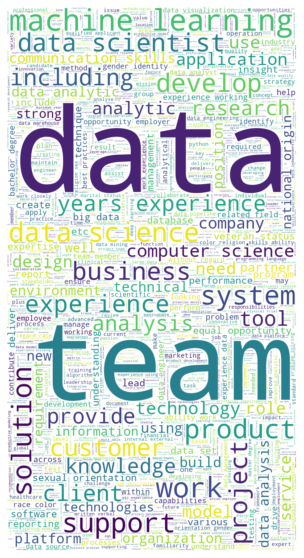

In [208]:
words = " ".join(df['Job Description'])
words_filtered = punctuation_stop(words)
text = " ".join([ele for ele in words_filtered])

cloud = WordCloud(background_color="white", random_state=1, stopwords=STOPWORDS, max_words=2000, width=800, height=1500)
cloud.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(cloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Part 5: Model Building

In [210]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_name', 'state', 'same_state', 'age', 'python', 'r_studio',
       'spark', 'aws', 'excel', 'job_simplified', 'seniority', 'JD_length',
       'num_competitors'],
      dtype='object')

In [232]:
# choose relevant columns
columns = ['avg_salary', 'Rating', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'num_competitors', 'hourly', 'employer_provided', 'state', 'same_state', 'age', 'python', 'spark', 'aws', 'excel', 'job_simplified', 'seniority', 'JD_length']
df_model = df[columns]
len(df_model.columns)

20

In [231]:
# get dummy data for one-hot encoding
df_dummies = pd.get_dummies(df_model)
df_dummies.head()

,avg_salary,Rating,num_competitors,hourly,employer_provided,same_state,age,python,spark,aws,...,job_simplified_analyst,job_simplified_data engineer,job_simplified_data scientist,job_simplified_director,job_simplified_manager,job_simplified_mle,job_simplified_na,seniority_jr,seniority_na,seniority_senior
0,72.0,3.8,0,0,0,0,47,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,87.5,3.4,0,0,0,0,36,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,85.0,4.8,0,0,0,1,10,1,1,0,...,0,0,1,0,0,0,0,0,1,0
3,76.5,3.8,3,0,0,1,55,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,114.5,2.9,3,0,0,1,22,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [233]:
from sklearn.model_selection import train_test_split

X = df_dummies.drop('avg_salary', axis=1)
y = df_dummies.avg_salary.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [236]:
# use statsmodel for linear regression 
import statsmodels.api as sm

X_stats = X = sm.add_constant(X)
stats = sm.OLS(y, X_stats)
stats.fit().summary()
# R-squared=0.708: pretty good; the model explains 70% of the variation in glassdoor salaries
# P-model (P>|t|) of less than 0.05 is significant: const (0.000), num_competitors
# for num_competitors (0.010), coef=2.2503 which means for each competitor we're getting $2,250 increase in salary
# for hourly (0.000) we're getting -36.56, we're making less money
# for employer_provided (0.007) it's the other way around
# for python (0.001), it's 8.1375, relevant
# for Type of ownership_Company - Public (0.020), you're making $13,284 more
# for Industry_Banks & Credit Unions (0.035), you're getting paid $32,429 less
# for Industry_Investment Banking & Asset Management (0.003) youre making $35,854 more
# for Sector_Information Technology (0.000) you're making $10,159 more
# for Revenue_ 5 to 10 million (USD) (0.000) you're making $31,813 more
# for state_CA (0.000) you're making $26,722 more
# for state_CT (0.037) you're making $23,717 less
# for state_DC (0.084) you're making $13,732 more
# for state_FL (0.038) you're making $15,882 less
# for state_NM (0.036) you're making $30,486 less

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     10.21
Date:                Sat, 02 Jan 2021   Prob (F-statistic):           1.47e-94
Time:                        09:25:46   Log-Likelihood:                -3311.6
No. Observations:                 742   AIC:                             6909.
Df Residuals:                     599   BIC:                             7568.
Df Model:                         142                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                43.6206      6.718      6.493      0.000      30.427      56.814
Rating                                                3.6072      1.937      1.862      0.063      -0.197       7.412
num_competitors                                       2.2503      0.868      2.592      0.010       0.545       3.955
hourly                                              -36.5646      9.173     -3.986      0.000     -54.580     -18.549
employer_provided                                    31.3732     11.524      2.722      0.007       8.741      54.006
same_state                                            2.4864      2.619      0.949      0.343      -2.657       7.629
age                                                   0.0352      0.030      1.172      0.242      -0.024       0.094
python                                                8.1375      2.523      3.225      0.001       3.182      13.093
spark                                                -0.5710      2.920     -0.196      0.845      -6.307       5.165
aws                                                   1.1218      2.736      0.410      0.682      -4.251       6.495
excel                                                -0.4049      2.268     -0.179      0.858      -4.858       4.049
JD_length                                            -0.0001      0.001     -0.171      0.864      -0.002       0.001
Size_-1                                              13.6113      8.629      1.577      0.115      -3.335      30.558
Size_1 to 50 employees                                1.1067      6.501      0.170      0.865     -11.660      13.874
Size_10000+ employees                                -2.8817      5.800     -0.497      0.619     -14.272       8.509
Size_1001 to 5000 employees                           6.1362      3.878      1.582      0.114      -1.481      13.753
Size_201 to 500 employees                             2.2568      3.873      0.583      0.560      -5.350       9.864
Size_5001 to 10000 employees                         -3.8766      5.440     -0.713      0.476     -14.561       6.808
Size_501 to 1000 employees                            2.1829      4.059      0.538      0.591      -5.790      10.155
Size_51 to 200 employees                              4.2001      4.422      0.950      0.343      -4.484      12.884
Size_Unknown                                         20.8850     13.992      1.493      0.136      -6.594      48.363
Type of ownership_-1                                 13.6113      8.629      1.577      0.115      -3.335      30.558
Type of ownership_College / University                6.4226     17.739      0.362      0.717     -28.415      41.260
Type of ownersh

In [241]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import numpy as np

linear = LinearRegression()
linear.fit(X_train, y_train)
cv_score = cross_val_score(linear, X_train, y_train, scoring='neg_mean_absolute_error', cv=3)
cv_score

array([-20.16372315, -19.71059269, -22.42624955])

In [242]:
np.mean(cv_score)

-20.766855128916806

In [247]:
# lasso regression
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.13)
lasso.fit(X_train, y_train)
np.mean(cross_val_score(lasso, X_train, y_train, scoring='neg_mean_absolute_error', cv=3))
# with default Lasso(), mean=-21.0941474114959
# after trying out the code below to find the optimal alpha=0.13, we try again with Lasso(alpha=.13), we get mean=-19.25779807999977

-19.25779807999977

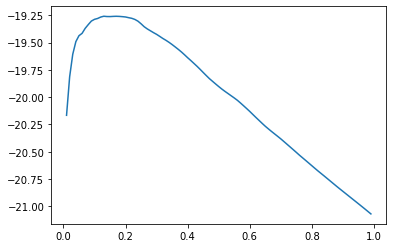

In [244]:
# try out different alpha values
alpha = []
error = []
for i in range(1, 100):
    alpha.append(i / 100)
    lasso = Lasso(alpha=(i / 100))
    error.append(np.mean(cross_val_score(lasso, X_train, y_train, scoring='neg_mean_absolute_error', cv=3)))
plt.plot(alpha, error)
# the graph peaks at around (0.2, -19.25)

In [245]:
err = tuple(zip(alpha, error))
df_err = pd.DataFrame(err, columns=['alpha','error'])
df_err[df_err.error == max(df_err.error)]
# this shows alpha=0.13 gives error=-19.2578, the best error term

,alpha,error
12,0.13,-19.257798


In [248]:
# random forest 
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
np.mean(cross_val_score(forest, X_train, y_train, scoring='neg_mean_absolute_error', cv=3))
# -15.153244287203677: this is a much better value

-15.153244287203677

In [249]:
# use GridsearchCV to tune the models
from sklearn.model_selection import GridSearchCV

# n_estimators: number of trees in the forest, default=100
# criteria: to measure the quality of a split; mse=mean squared error, mae=mean absolute error
# max_features: number of features to consider when looking for the best split
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}
grid = GridSearchCV(forest, parameters, scoring='neg_mean_absolute_error', cv=3)
# THIS WILL TAKE A LONG TIME, LIKE 30 MINUTES!!!
grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [250]:
grid.best_score_
# score improved to -14.7842818470818

-14.7842818470818

In [251]:
# n_estimators=220, criterion='mse', max_features='auto'
grid.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=220, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [260]:
# test ensembles 
linear_predict = linear.predict(X_test)
lasso_predict = lasso.predict(X_test)
forest_predict = grid.best_estimator_.predict(X_test)

In [261]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, linear_predict)

18.85518999021512

In [262]:
mean_absolute_error(y_test, lasso_predict)

19.66530371274991

In [263]:
mean_absolute_error(y_test, forest_predict)

10.947971323978035

In [264]:
mean_absolute_error(y_test, (lasso_predict+forest_predict)/2)

14.777050681165479

In [275]:
import pickle

pickl = { 'model': grid.best_estimator_ }
filename = 'glassdoor_model.pkl'
pickle.dump(pickl, open(filename, 'wb'))

In [276]:
with open(filename, 'rb') as file:
    data = pickle.load(file)
    model = data['model']

sample = list(X_test.iloc[1,:])
model.predict(np.array(sample).reshape(1,-1))[0]

52.66818181818182

## Part 6: Putting the Model into Production

* reference: https://towardsdatascience.com/productionize-a-machine-learning-model-with-flask-and-heroku-8201260503d2

### Set up environment
in a terminal:
* cd glassdoor
* conda create -n flask_env python=3.7
* conda activate flask_env
* optional: conda deactivate
* conda install flask
* conda install pandas
* conda install scikit-learn
* conda install requests
* pip freeze > requirements.txt
* touch Procfile (necessary??)
* mkdir models
* cp glassdoor_models.pkl models

### Test flask server with a hello route method

* copy app.py from Ken's repository to models directory, rename it to server.py
* in server.py, write a route method named hello, to print something
* in a terminal, run: python server.py
* in a browser, run: http://127.0.0.1:5000/hello and verify the print message from the hello method*

### Test flask with a hardcode route method

* edit server.py and add a hardcode route method
* copy data_input.py and rename it to datafile.py, also customize it
* in server.py, write a route method named hardcode that:
  * loads data from datafile.py
  * loads model from saved pickle file 'glassdoor_model.pkl'
  * uses model to predict based on data
* in a browser, run: http://127.0.0.1:5000/hardcode

### Test flask with predict route method:

references:
* https://www.geeksforgeeks.org/get-post-requests-using-python/
* https://requests.readthedocs.io/en/master/user/quickstart/

opening http://127.0.0.1:5000/predict in a browser is the equivalent of running the command:
* curl -X GET http://127.0.0.1:5000/predict -H "Content-Type: application/json" -d '{"input":"7"}'

which requires:
* the URL
* the headers (-H option)
* the data (-d option)

* copy requests.py to current directory
* edit requests.py:
  * URL = 'http://127.0.0.1:5000/predict'
  * headers = { 'Content-Type': 'application/json' }
  * data = { 'input': data }

in a browser, run: http://127.0.0.1:5000/predict

couldn't figure it out. i give up!